# High-Performance Particle System Animation

This notebook demonstrates how to create an efficient animated particle system visualization following MATLAB's best practices for performance. We'll create a system of 50 particles moving with random walk motion in 2D space, including trailing paths for each particle.

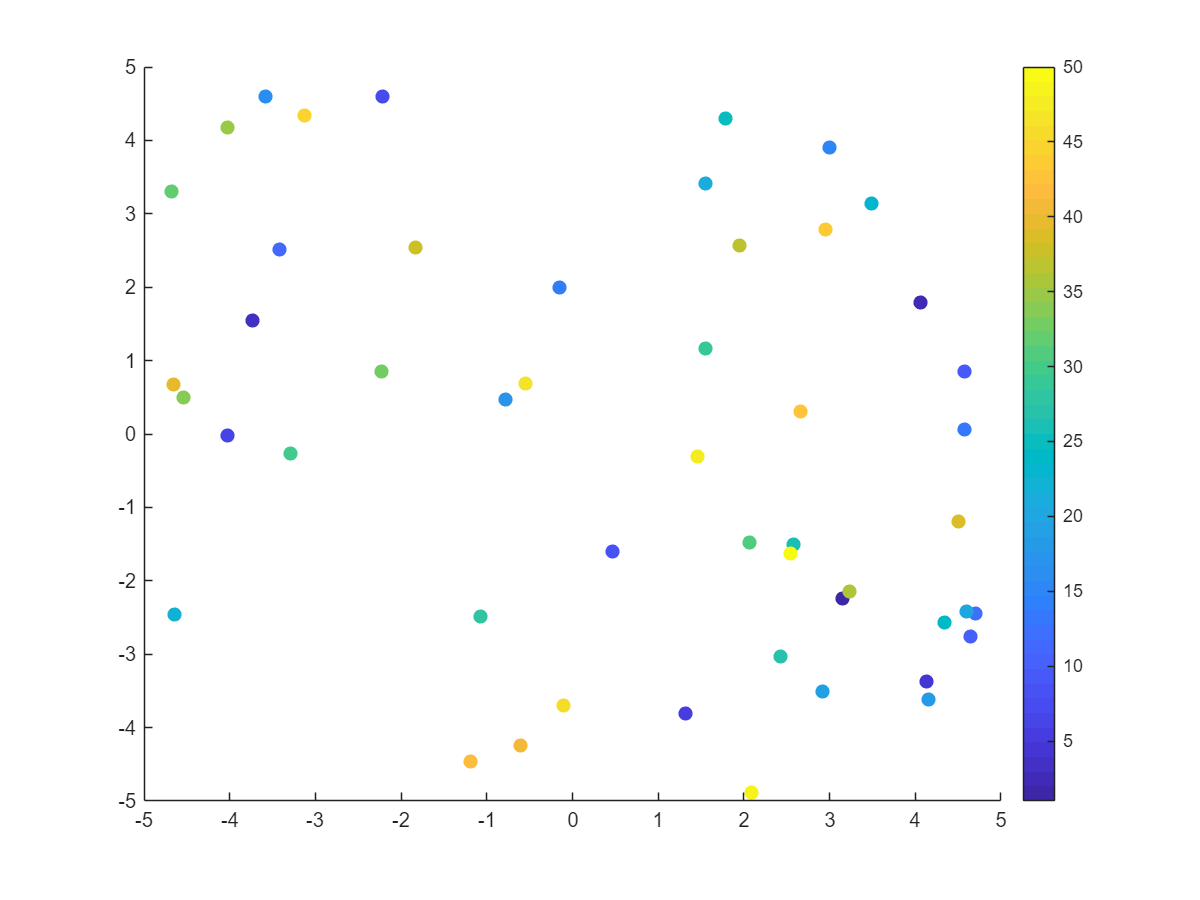

In [1]:
% Initialize parameters
numParticles = 50;    % Number of particles
numFrames = 1500;     % Number of animation frames
trailLength = 20;     % Length of trailing paths

% Initialize particle positions and trails
positions = zeros(numParticles, 2, trailLength);
positions(:,:,1) = 10 * (rand(numParticles, 2) - 0.5);  % Random initial positions

% Create figure and setup axes
figure('Position', [100 100 800 600]);
ax = axes;
xlim(ax, [-10 10]);
ylim(ax, [-10 10]);
title('Particle System Animation');
xlabel('X Position');
ylabel('Y Position');
grid on;

% Create scatter plot object for particles (efficiency: create once)
h_particles = scatter(ax, positions(:,1,1), positions(:,2,1), 50, ...
    (1:numParticles)', 'filled');
colormap(ax, parula(numParticles));
colorbar;

% Create line objects for trails (efficiency: create all at once)
h_trails = gobjects(numParticles, 1);
for i = 1:numParticles
    h_trails(i) = line(ax, NaN(1,trailLength), NaN(1,trailLength), ...
        'Color', [0.7 0.7 0.7], 'LineWidth', 1);
end

% Force initial draw
drawnow;

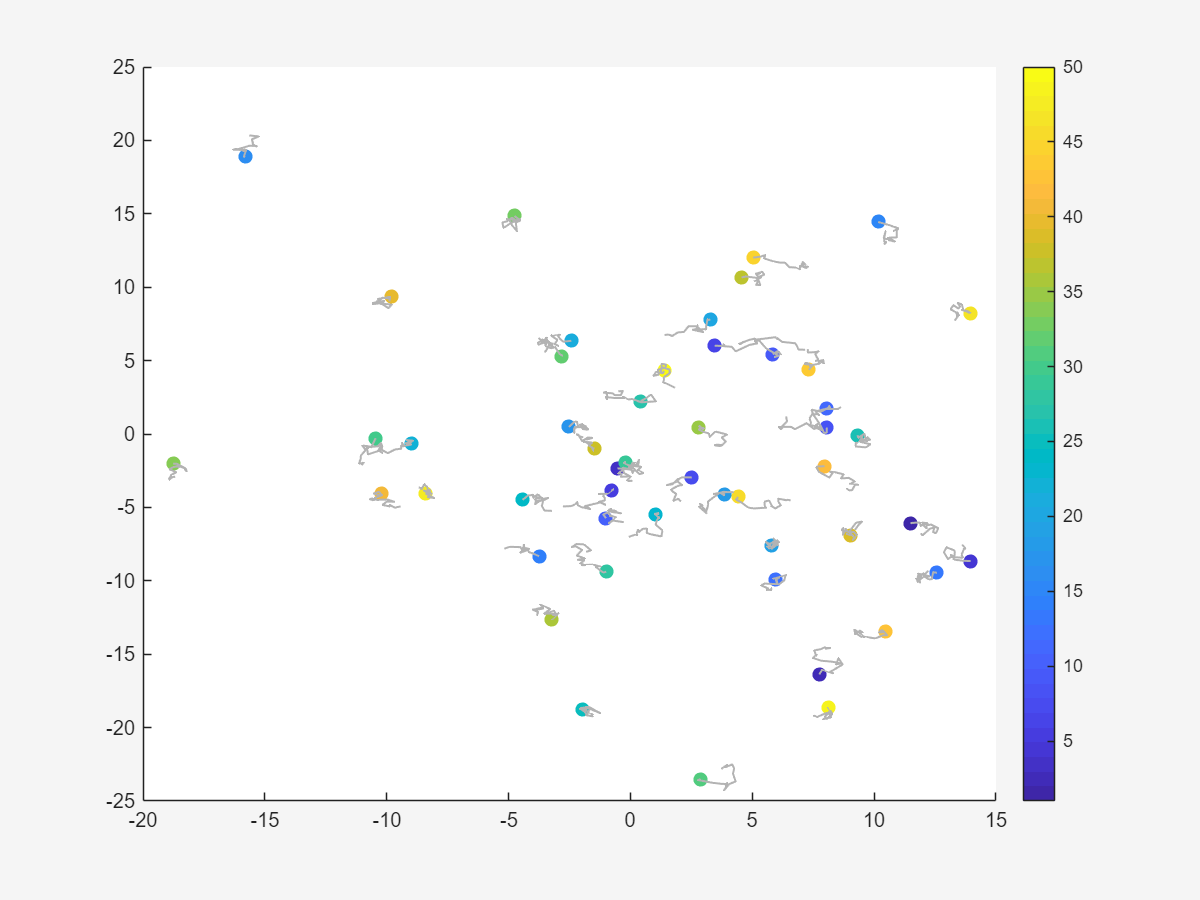

In [2]:
% Animation loop
for frame = 1:numFrames
    % Update positions with random walk
    newPositions = positions(:,:,1) + 0.2 * randn(numParticles, 2);
    
    % Update trails
    positions(:,:,2:end) = positions(:,:,1:end-1);
    positions(:,:,1) = newPositions;
    
    % Update particle positions (efficient: update XData/YData only)
    h_particles.XData = positions(:,1,1);
    h_particles.YData = positions(:,2,1);
    
    % Update trail positions (efficient: update XData/YData only)
    for i = 1:numParticles
        h_trails(i).XData = squeeze(positions(i,1,:));
        h_trails(i).YData = squeeze(positions(i,2,:));
    end
    
    % Efficient display update with frame rate limit
    drawnow limitrate
end

# Code Explanation

The visualization above demonstrates several MATLAB performance best practices for animations:

1. **Pre-allocation**: All data structures (positions array) are pre-allocated
2. **Single Object Creation**: Plot objects (scatter and lines) are created once before the animation
3. **Efficient Updates**: Only XData/YData properties are updated, not recreating plots
4. **Manual Limits**: Axis limits are set explicitly to prevent auto-scaling
5. **Frame Rate Control**: Uses 'drawnow limitrate' to maintain smooth animation
6. **Vectorized Operations**: Updates particle positions using vectorized calculations
7. **Memory Efficiency**: Trails are implemented using line objects with finite history

The result is a smooth, efficient animation of particles with trailing paths, colored by particle index.